In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel(r"C:\Users\hp\Documents\parameters.xlsx")

In [3]:
df.head()

,ID,Type_par,Depth_top,Depth_bottom,Value
0,1,VS,0.0,1.0,120
1,1,VS,1.0,3.5,150
2,1,VS,3.5,5.0,170
3,1,VS,5.0,9.0,240
4,1,VS,9.0,19.0,170


In [4]:
df.dtypes

ID                int64
Type_par         object
Depth_top       float64
Depth_bottom    float64
Value            object
dtype: object

In [5]:
print(df.isnull().sum())

missing_rows = df[df.isnull().any(axis=1)]

missing_rows["Type_par"].value_counts() #To know what parameter has the most missing values

ID                0
Type_par          0
Depth_top       201
Depth_bottom    207
Value             3
dtype: int64


FR    160
SG     22
G      10
L       3
W       3
IP      3
NN      2
K       2
SA      1
LM      1
AR      1
F1      1
C       1
Name: Type_par, dtype: int64

In [6]:
char_df = df[df["Value"].apply(lambda x: isinstance(x, str))]
num_df = df[df["Value"].apply(lambda x: isinstance(x, (int, float)))]

In [7]:
num_df["Value"] = num_df["Value"].astype(float)

C:\Users\hp\AppData\Local\Temp/ipykernel_27052/4021540229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df["Value"] = num_df["Value"].astype(float)


In [8]:
num_df.dtypes

ID                int64
Type_par         object
Depth_top       float64
Depth_bottom    float64
Value           float64
dtype: object

In [9]:
num_df["Type_par"].value_counts()

QC     368683
FS     366914
U       36219
VS       4387
G         260
PTM       245
FR        162
CU        149
SG         22
IP         22
W          20
PV         19
CAM        12
E1          7
PT          6
LM          6
SA          5
L           3
KR          3
NN          2
VP          2
AR          2
K           2
F1          1
C           1
Name: Type_par, dtype: int64

In [10]:
shear_velocity = num_df[num_df["Type_par"] == "VS"]

In [11]:
shear_velocity

,ID,Type_par,Depth_top,Depth_bottom,Value
0,1,VS,0.0,1.0,120.0
1,1,VS,1.0,3.5,150.0
2,1,VS,3.5,5.0,170.0
3,1,VS,5.0,9.0,240.0
4,1,VS,9.0,19.0,170.0
...,...,...,...,...,...
732522,1724,VS,19.0,21.0,193.0
732523,1724,VS,21.0,23.0,276.0
732524,1724,VS,23.0,25.0,257.0
732525,1724,VS,25.0,27.0,277.0


In [12]:
shear_velocity.drop("Depth_bottom", inplace=True, axis=1)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
shear_velocity

,ID,Type_par,Depth_top,Value
0,1,VS,0.0,120.0
1,1,VS,1.0,150.0
2,1,VS,3.5,170.0
3,1,VS,5.0,240.0
4,1,VS,9.0,170.0
...,...,...,...,...
732522,1724,VS,19.0,193.0
732523,1724,VS,21.0,276.0
732524,1724,VS,23.0,257.0
732525,1724,VS,25.0,277.0


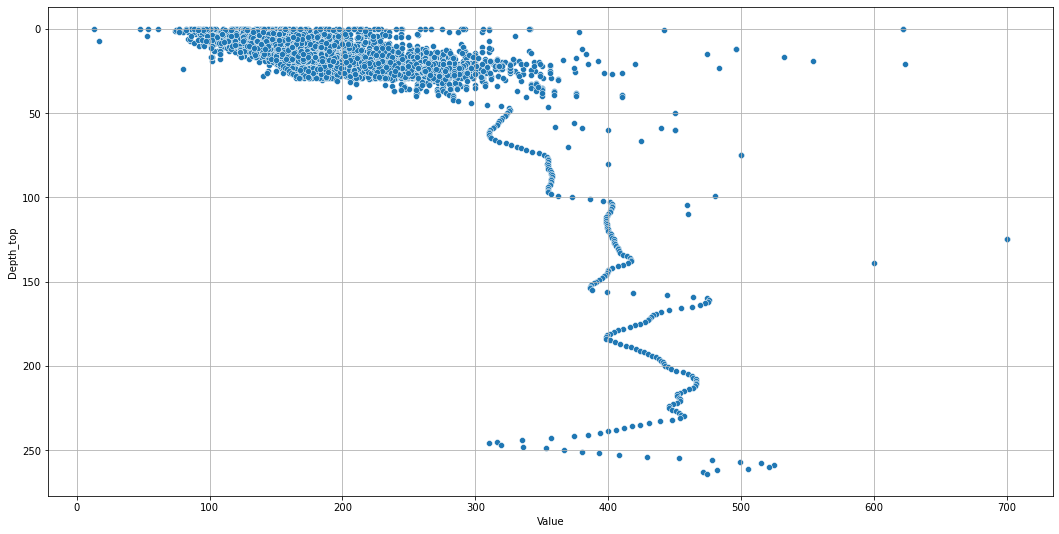

In [14]:
plt.figure(figsize=(18,9))

sns.scatterplot(data=shear_velocity, x="Value", y="Depth_top")

plt.gca().invert_yaxis()

plt.grid(True)
plt.show()

In [15]:
tip_resistance = num_df[num_df["Type_par"] == "QC"]

In [16]:
tip_resistance.head()

,ID,Type_par,Depth_top,Depth_bottom,Value
190,32,QC,0.36,0.40,1.543104
192,32,QC,0.40,0.44,0.240267
194,32,QC,0.44,0.48,0.202020
196,32,QC,0.48,0.52,1.542483
198,32,QC,0.52,0.56,1.545792


(array([60090., 66151., 62593., 56237., 47815., 29356., 26204., 14322.,
         3732.,  2183.]),
 array([-0.2 ,  3.82,  7.84, 11.86, 15.88, 19.9 , 23.92, 27.94, 31.96,
        35.98, 40.  ]),
 <BarContainer object of 10 artists>)

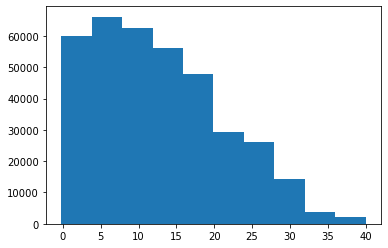

In [22]:
plt.hist(tip_resistance["Depth_top"])

In [17]:
avg_tip = tip_resistance.groupby("Depth_top", as_index=False)["Value"].max() #Max tip resistance for each depth

In [18]:
avg_tip.head() #Display first five rows

,Depth_top,Value
0,-0.200,3.599280
1,-0.198,3.917761
2,-0.191,0.392000
3,-0.190,0.390000
4,-0.145,2.222600


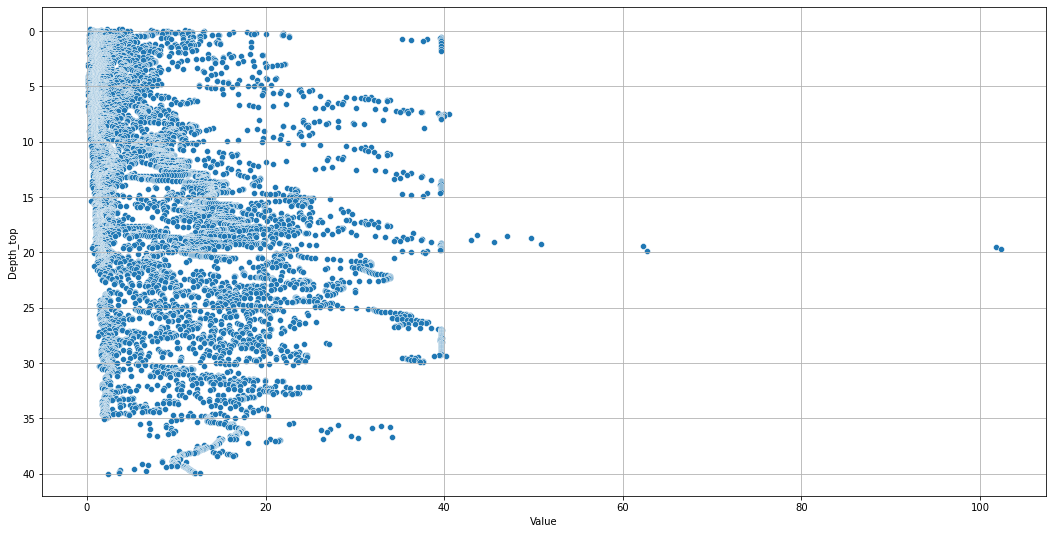

In [19]:
plt.figure(figsize=(18,9))

sns.scatterplot(data=avg_tip, x="Value", y="Depth_top")

plt.gca().invert_yaxis()

plt.grid(True)
plt.show()

In [21]:
pore_pressure = num_df[num_df["Type_par"] == "U"]

In [ ]:
p